In [59]:
'''
1 ) "uber-raw-data-janjune-15.csv" ->> this data contains all the entries/pickups from 'January' to 'June'
    Quite huge dataset having approx 15M data pts , so lets consider its sample which have approx 1M


2 ) "uber-raw-data-janjune-15_sample.csv" ->> this data is a sample of "uber-raw-data-janjune-15.csv"
    'Since above data is quite huge ~15 Million data pts , hence it is good to work with some sample
     if u do not have good specifications in your systems

'''

'\n1 ) "uber-raw-data-janjune-15.csv" ->> this data contains all the entries/pickups from \'January\' to \'June\'\n    Quite huge dataset having approx 15M data pts , so lets consider its sample which have approx 1M\n\n\n2 ) "uber-raw-data-janjune-15_sample.csv" ->> this data is a sample of "uber-raw-data-janjune-15.csv"\n    \'Since above data is quite huge ~15 Million data pts , hence it is good to work with some sample\n     if u do not have good specifications in your systems\n\n'

# 1.. Lets Read data for Analysis

In [60]:
### lets import all the necessary packages !

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
import os

In [62]:
os.listdir(r"/mnt")

['other-Dial7_B00887.csv',
 'uber-raw-data-janjune-15_sample.csv',
 'other-Federal_02216.csv',
 'other-Prestige_B01338.csv',
 'Uber-Jan-Feb-FOIL.csv',
 'other-FHV-services_jan-aug-2015.csv',
 'other-Highclass_B01717.csv',
 'other-Lyft_B02510.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv',
 'uber-raw-data-apr14.csv',
 'other-American_B01362.csv',
 'other-Diplo_B01196.csv',
 'other-Firstclass_B01536.csv',
 'other-Skyline_B00111.csv',
 'uber-raw-data-janjune-15.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-jun14.csv',
 'other-Carmel_B00256.csv']

In [63]:
uber_15 = pd.read_csv(r"/mnt/uber-raw-data-janjune-15_sample.csv")

In [64]:
uber_15.shape

(100000, 4)

## 2.. Lets Perform Data pre-processing/Data cleaning !
        check data-type , check missing values , check whether duplicated values or not !
        ie Prepare Data for Analysis !

In [65]:
type(uber_15)

pandas.core.frame.DataFrame

In [66]:
uber_15.duplicated().sum()

54

In [67]:
uber_15.drop_duplicates(inplace=True)

In [68]:
uber_15.duplicated().sum()

0

In [69]:
uber_15.shape

(99946, 4)

In [70]:
uber_15.dtypes

,0
Dispatching_base_num,object
Pickup_date,object
Affiliated_base_num,object
locationID,int64


In [71]:
uber_15.isnull().sum()

,0
Dispatching_base_num,0
Pickup_date,0
Affiliated_base_num,1116
locationID,0


In [72]:
uber_15['Pickup_date'][0]

'2015-05-02 21:43:00'

In [73]:
type(uber_15['Pickup_date'][0])

str

In [74]:
uber_15['Pickup_date'] = pd.to_datetime(uber_15['Pickup_date'])

In [75]:
uber_15['Pickup_date'].dtype

dtype('<M8[ns]')

In [76]:
uber_15['Pickup_date'][0]

Timestamp('2015-05-02 21:43:00')

In [77]:
type(uber_15['Pickup_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [78]:
uber_15.dtypes

,0
Dispatching_base_num,object
Pickup_date,datetime64[ns]
Affiliated_base_num,object
locationID,int64


In [79]:
'''
datetime64[ns] is a general dtype, while <M8[ns] is a specific dtype , ns is basicaly nano second..
Both are similar , it entirely how your numpy was compiled..

If u want to cross check using Code :
np.dtype('datetime64[ns]') == np.dtype('<M8[ns]')



'''

"\ndatetime64[ns] is a general dtype, while <M8[ns] is a specific dtype , ns is basicaly nano second..\nBoth are similar , it entirely how your numpy was compiled..\n\nIf u want to cross check using Code :\nnp.dtype('datetime64[ns]') == np.dtype('<M8[ns]')\n\n\n\n"

In [80]:
'''
Categorical data has : Object & bool data-types
Numerical data have : Integer & Float data-type


Categorical data refers to a data type that can be stored into groups/categories/labels
Examples of categorical variables are  age group, blood type etc..


Numerical data refers to the data that is in the form of numbers,
Examples of numerical data are height, weight, age etc..

Numerical data has two categories: discrete data and continuous data


Discrete data : It basically takes countable numbers like 1, 2, 3, 4, 5, and so on.
                age of a fly : 8 , 9 day etc..

Continuous data : which is continuous in nature
                  amount of sugar , 11.2 kg  , temp of a city  , your bank balance !



'''

'\nCategorical data has : Object & bool data-types\nNumerical data have : Integer & Float data-type\n\n\nCategorical data refers to a data type that can be stored into groups/categories/labels\nExamples of categorical variables are  age group, blood type etc..\n\n\nNumerical data refers to the data that is in the form of numbers,\nExamples of numerical data are height, weight, age etc..\n\nNumerical data has two categories: discrete data and continuous data\n\n\nDiscrete data : It basically takes countable numbers like 1, 2, 3, 4, 5, and so on.\n                age of a fly : 8 , 9 day etc..\n\nContinuous data : which is continuous in nature\n                  amount of sugar , 11.2 kg  , temp of a city  , your bank balance !\n\n\n\n'

In [81]:
'''

Variations of int are : ('int64','int32','int16') in numpy library..


Int16 is a 16 bit signed integer , it means it can store both positive & negative values
int16 has has a range of  (2^15 − 1) to -2^15
int16 has a length of 16 bits (2 bytes).. ie Int16 uses 16 bits


Int32 is a 32 bit signed integer , it means it storesboth positive & negative values
int32 has has a range of (2³¹ − 1) to  -2^31
int32 has a length of 32 bits (4 bytes),, ie Int32 uses 32 bits


Int64 is a 64 bit signed integer , it means it can store both positive & negative values
int64 has has a range of  (2^63 − 1) to -2^63
int64 has a length of 64 bits (8 bytes) , ie Int64 uses 64 bits.


The only difference is that int64 has max range of storing numbers , then comes int32 , then 16 , then int8

That means that Int64’s take up twice as much memory-and doing
operations on them may be a lot slower in some machine architectures.

However, Int64’s can represent numbers much more accurately than
32 bit floats.They also allow much larger numbers to be stored..

'''


"\n\nVariations of int are : ('int64','int32','int16') in numpy library..\n\n\nInt16 is a 16 bit signed integer , it means it can store both positive & negative values\nint16 has has a range of  (2^15 − 1) to -2^15\nint16 has a length of 16 bits (2 bytes).. ie Int16 uses 16 bits\n\n\nInt32 is a 32 bit signed integer , it means it storesboth positive & negative values\nint32 has has a range of (2³¹ − 1) to  -2^31\nint32 has a length of 32 bits (4 bytes),, ie Int32 uses 32 bits\n\n\nInt64 is a 64 bit signed integer , it means it can store both positive & negative values\nint64 has has a range of  (2^63 − 1) to -2^63\nint64 has a length of 64 bits (8 bytes) , ie Int64 uses 64 bits.\n\n\nThe only difference is that int64 has max range of storing numbers , then comes int32 , then 16 , then int8\n\nThat means that Int64’s take up twice as much memory-and doing\noperations on them may be a lot slower in some machine architectures.\n\nHowever, Int64’s can represent numbers much more accurately

In [82]:
'''

Variations of unsigned integer are : ('uint64','uint32','uint16','uint8') in numpy library..
By the way , all the variations of signed integers comes sub-class numpy.unsignedinteger

uint8 is a 8 bit un-signed integer , it means it can store only positive values
Range->> Integer values from (0 to 255) ie [0 to 2^8 -1]
uint8 has a length of 8 bits (1 bytes).

uint16 is a 16 bit un-signed integer , it means it can store only positive values
Range->> Integer values from (0 to 65535) ie [0 to 2^16 -1]
uint16 has a length of 16 bits (2 bytes).


uint32 is a 32 bit un-signed integer , it means it can store only positive values
Range->> Integer values from (0 to 4294967295) ie [0 to 2^32 -1]
uint32 has a length of 32 bits (4 bytes).


uint64 is a 64 bit un-signed integer , it means it can store only positive values
Range->> Integer values from (0 to 18446744073709551615) ie [0 to 2^64 -1]
uint64 has a length of 64 bits (8 bytes).

'''

"\n\nVariations of unsigned integer are : ('uint64','uint32','uint16','uint8') in numpy library..\nBy the way , all the variations of signed integers comes sub-class numpy.unsignedinteger\n\nuint8 is a 8 bit un-signed integer , it means it can store only positive values\nRange->> Integer values from (0 to 255) ie [0 to 2^8 -1]\nuint8 has a length of 8 bits (1 bytes).\n\nuint16 is a 16 bit un-signed integer , it means it can store only positive values\nRange->> Integer values from (0 to 65535) ie [0 to 2^16 -1]\nuint16 has a length of 16 bits (2 bytes).\n\n\nuint32 is a 32 bit un-signed integer , it means it can store only positive values\nRange->> Integer values from (0 to 4294967295) ie [0 to 2^32 -1]\nuint32 has a length of 32 bits (4 bytes).\n\n\nuint64 is a 64 bit un-signed integer , it means it can store only positive values\nRange->> Integer values from (0 to 18446744073709551615) ie [0 to 2^64 -1]\nuint64 has a length of 64 bits (8 bytes).\n\n"

# 3.. Which month have max. Uber pickups in New York City ?

In [83]:
uber_15

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-02 21:43:00,B02764,237
1,B02682,2015-01-20 19:52:59,B02682,231
2,B02617,2015-03-19 20:26:00,B02617,161
3,B02764,2015-04-10 17:38:00,B02764,107
4,B02764,2015-03-23 07:03:00,B00111,140
...,...,...,...,...
99995,B02764,2015-04-13 16:12:00,B02764,234
99996,B02764,2015-03-06 21:32:00,B02764,24
99997,B02598,2015-03-19 19:56:00,B02598,17
99998,B02682,2015-05-02 16:02:00,B02682,68


In [84]:
uber_15['month'] = uber_15['Pickup_date'].dt.month_name()

In [85]:
uber_15['month']

,month
0,May
1,January
2,March
3,April
4,March
...,...
99995,April
99996,March
99997,March
99998,May


<Axes: xlabel='month'>

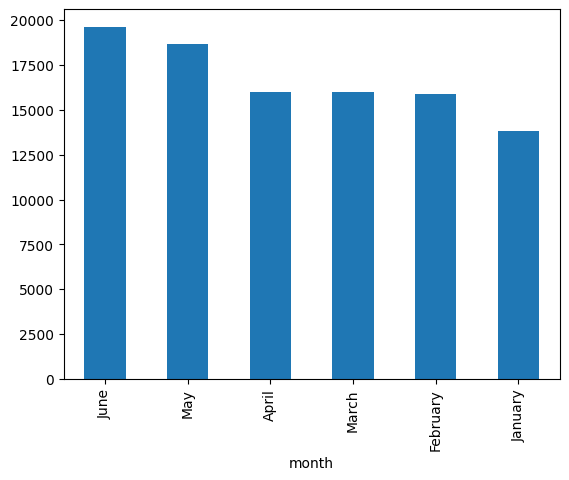

In [86]:
uber_15['month'].value_counts().plot(kind='bar')

In [87]:
'''
Inference : June seems to have max Uber Pickups

'''

'\nInference : June seems to have max Uber Pickups\n\n'

In [88]:
## extracting dervied features (weekday ,day ,hour ,month ,minute) from 'Pickup_date'..

uber_15['weekday'] = uber_15['Pickup_date'].dt.day_name()
uber_15['day'] = uber_15['Pickup_date'].dt.day
uber_15['hour'] = uber_15['Pickup_date'].dt.hour
uber_15['minute'] = uber_15['Pickup_date'].dt.minute

In [89]:
uber_15.head(4)

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,month,weekday,day,hour,minute
0,B02617,2015-05-02 21:43:00,B02764,237,May,Saturday,2,21,43
1,B02682,2015-01-20 19:52:59,B02682,231,January,Tuesday,20,19,52
2,B02617,2015-03-19 20:26:00,B02617,161,March,Thursday,19,20,26
3,B02764,2015-04-10 17:38:00,B02764,107,April,Friday,10,17,38


In [90]:
## pd.crosstab() is used to create pivot table ..

pivot = pd.crosstab(index=uber_15['month'] , columns=uber_15['weekday'])

In [91]:
pivot

weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
month,,,,,,,
April,2365,1833,2508,2052,2823,1880,2521
February,2655,1970,2550,2183,2396,2129,2013
January,2508,1353,2745,1651,2378,1444,1740
June,2793,2848,3037,2485,2767,3187,2503
March,2465,2115,2522,2379,2093,2388,2007
May,3262,1865,3519,2944,2627,2115,2328


<Axes: xlabel='month'>

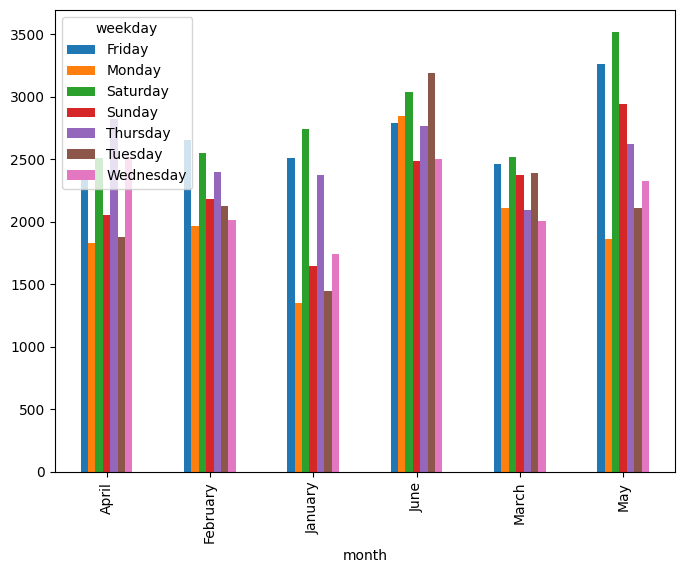

In [92]:
## grouped-bar plot using Pandas ..
pivot.plot(kind='bar' , figsize=(8,6))

In [93]:
'''

On Saturday & Friday, u are getting more Uber pickups in each month , it seems that New Yorkers used to go for
shopping , Malls , fun activities alot on these days

'''

'\n\nOn Saturday & Friday, u are getting more Uber pickups in each month , it seems that New Yorkers used to go for\nshopping , Malls , fun activities alot on these days\n\n'

# 4.. Lets Find out Hourly Rush in New york city on all days

In [94]:
summary = uber_15.groupby(['weekday' , 'hour'] , as_index=False).size()

In [95]:
summary

,weekday,hour,size
0,Friday,0,581
1,Friday,1,333
2,Friday,2,197
3,Friday,3,138
4,Friday,4,161
...,...,...,...
163,Wednesday,19,1044
164,Wednesday,20,897
165,Wednesday,21,949
166,Wednesday,22,900


<Axes: xlabel='hour', ylabel='size'>

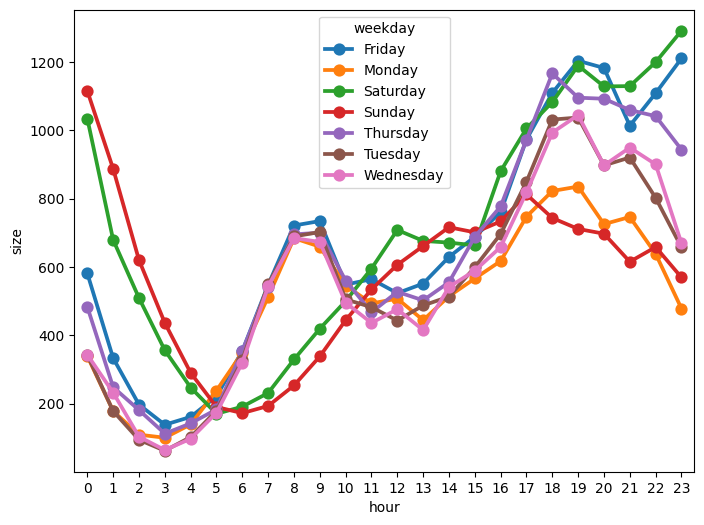

In [96]:
## pointplot between 'hour' & 'size' for all the weekdays..

plt.figure(figsize=(8,6))
sns.pointplot(x="hour" , y="size" , hue="weekday" , data=summary)

In [97]:
'''
It's interesting to see that Saturday and Sunday exhibit similar demand throughout the late night/morning/afternoon,
but it exhibits opposite trends during the evening. In the evening, Saturday pickups continue to increase throughout the evening,
but Sunday pickups takes a downward turn after evening..

We can see that there the weekdays that has the most demand during the late evening is Friday and Saturday,
which is expected, but what strikes me is that Thursday nights also exhibits very similar trends as Friday and Saturday nights.

It seems like New Yorkers are starting their 'weekends' on Thursday nights. :)


'''

"\nIt's interesting to see that Saturday and Sunday exhibit similar demand throughout the late night/morning/afternoon,\nbut it exhibits opposite trends during the evening. In the evening, Saturday pickups continue to increase throughout the evening,\nbut Sunday pickups takes a downward turn after evening..\n\nWe can see that there the weekdays that has the most demand during the late evening is Friday and Saturday,\nwhich is expected, but what strikes me is that Thursday nights also exhibits very similar trends as Friday and Saturday nights.\n\nIt seems like New Yorkers are starting their 'weekends' on Thursday nights. :)\n\n\n"

# 5.. Which Base_number has most number of Active Vehicles ??

In [98]:
uber_15.columns

Index(['Dispatching_base_num', 'Pickup_date', 'Affiliated_base_num',
       'locationID', 'month', 'weekday', 'day', 'hour', 'minute'],
      dtype='object')

In [99]:
os.listdir(r"/mnt/")

['other-Dial7_B00887.csv',
 'uber-raw-data-janjune-15_sample.csv',
 'other-Federal_02216.csv',
 'other-Prestige_B01338.csv',
 'Uber-Jan-Feb-FOIL.csv',
 'other-FHV-services_jan-aug-2015.csv',
 'other-Highclass_B01717.csv',
 'other-Lyft_B02510.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv',
 'uber-raw-data-apr14.csv',
 'other-American_B01362.csv',
 'other-Diplo_B01196.csv',
 'other-Firstclass_B01536.csv',
 'other-Skyline_B00111.csv',
 'uber-raw-data-janjune-15.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-jun14.csv',
 'other-Carmel_B00256.csv']

In [100]:
uber_foil = pd.read_csv(r"/mnt/Uber-Jan-Feb-FOIL.csv")

In [101]:
uber_foil.shape

(354, 4)

In [102]:
uber_foil.head(3)

,dispatching_base_number,date,active_vehicles,trips
0,B02512,1/1/2015,190,1132
1,B02765,1/1/2015,225,1765
2,B02764,1/1/2015,3427,29421


In [103]:
### establishing the entire set-up of Plotly..

In [104]:
!pip install chart_studio ## chart_studio provides a web-service for hosting graphs!
!pip install plotly

In [105]:
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.express as px

from plotly.offline import download_plotlyjs , init_notebook_mode , plot , iplot
## iplot() when working in a Jupyter Notebook to display the plot in the notebook.
## U have to do a proper setup of plotly , otherwise plotly plots gets open in a web-browser instead of Jupyter notebook


In [106]:
init_notebook_mode(connected=True)

In [107]:
uber_foil.columns

Index(['dispatching_base_number', 'date', 'active_vehicles', 'trips'], dtype='object')

In [108]:
px.box(x='dispatching_base_number' , y='active_vehicles' , data_frame=uber_foil)

In [109]:
### if u need distribution +  5-summary stats of data , its good to go with violinplot
px.violin(x='dispatching_base_number' , y='active_vehicles' , data_frame=uber_foil)

# 6.. Collect entire data & Make it ready for the Data Analysis..

In [110]:
files = os.listdir(r"/mnt/")[-8:]

In [111]:
files

['other-American_B01362.csv',
 'other-Diplo_B01196.csv',
 'other-Firstclass_B01536.csv',
 'other-Skyline_B00111.csv',
 'uber-raw-data-janjune-15.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-jun14.csv',
 'other-Carmel_B00256.csv']

In [112]:
files

['other-American_B01362.csv',
 'other-Diplo_B01196.csv',
 'other-Firstclass_B01536.csv',
 'other-Skyline_B00111.csv',
 'uber-raw-data-janjune-15.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-jun14.csv',
 'other-Carmel_B00256.csv']

In [113]:
#blank dataframe
final = pd.DataFrame()

path = r"/mnt/"

for file in files :
    # Added encoding parameter, try 'latin-1' first
    current_df = pd.read_csv(path+'/'+file, encoding='latin-1')
    final = pd.concat([current_df , final])

# If 'latin-1' does not work, try 'cp1252' or other encodings depending on the source of the data

In [114]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [115]:
final.shape

(16504844, 21)

In [116]:
### After Collecting entire data ,u might ask is : Do we have duplicate entires in data ?
### We are going to remove duplicates data when the entire row is duplicated

In [117]:
### first lets figure out total observations where we have duplicate values..
final.duplicated().sum()

941527

In [118]:
## drop duplicate rows ..
final.drop_duplicates(inplace=True)

In [119]:
final.shape

(15563317, 21)

In [120]:
final.head(3)

,Date,Time,PU_Adress,Base_No,Date/Time,Lat,Lon,Base,Dispatching_base_num,Pickup_date,...,locationID,Street_Address,City_State,Unnamed: 4,Unnamed: 5,DATE,TIME,PICK UP ADDRESS,PU_Address,Unnamed: 3
0,7/1/2014,0:00,260 W 44 St NYC,B00256,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7/1/2014,0:00,125 W 29 St Nyc,B00256,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7/1/2014,0:00,141 W 28 St Nyc,B00256,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Dataset Information :

### The dataset contains information about the Datetime, Latitude, Longitude and Base of each uber ride that happened in the month of July 2014 at New York City, USA

##### Date/Time : The date and time of the Uber pickup

##### Lat : The latitude of the Uber pickup

##### Lon : The longitude of the Uber pickup

##### Base : The TLC base company code affiliated with the Uber pickup

    The Base codes are for the following Uber bases:
    B02512 : Unter
    B02598 : Hinter
    B02617 : Weiter
    B02682 : Schmecken
    B02764 : Danach-NY


# 7.. at what locations of New York City we are getting rush ??

In [121]:
### ie where-ever we have more data-points or more density, it means more rush is at there !

In [122]:
rush_uber = final.groupby(['Lat' , 'Lon'] , as_index=False).size()

In [123]:
rush_uber.head(6)

,Lat,Lon,size
0,39.6569,-74.2258,1
1,39.6686,-74.1607,1
2,39.9196,-74.1112,1
3,39.9378,-74.0721,1
4,39.9445,-74.1374,1
5,39.9504,-74.1970,1


In [124]:
!pip install folium

In [125]:
import folium

In [126]:
basemap = folium.Map()

In [127]:
basemap

In [128]:
from folium.plugins import HeatMap

In [129]:
HeatMap(rush_uber).add_to(basemap)

In [130]:
basemap

Output hidden; open in https://colab.research.google.com to view.

    We can see a number of hot spots here. Midtown Manhattan is clearly a huge bright spot
    & these are made from Midtown to Lower Manhattan followed by Upper Manhattan and the Heights of Brooklyn.

# 8.. Examine rush on Hour and Weekday ( Perform Pair wise Analysis )

In [131]:
final.columns

Index(['Date', 'Time', 'PU_Adress', 'Base_No', 'Date/Time', 'Lat', 'Lon',
       'Base', 'Dispatching_base_num', 'Pickup_date', 'Affiliated_base_num',
       'locationID', '    Street_Address ', '    City_State ', 'Unnamed: 4',
       'Unnamed: 5', 'DATE', 'TIME', 'PICK UP ADDRESS', 'PU_Address',
       'Unnamed: 3'],
      dtype='object')

In [132]:
final.head(3)

,Date,Time,PU_Adress,Base_No,Date/Time,Lat,Lon,Base,Dispatching_base_num,Pickup_date,...,locationID,Street_Address,City_State,Unnamed: 4,Unnamed: 5,DATE,TIME,PICK UP ADDRESS,PU_Address,Unnamed: 3
0,7/1/2014,0:00,260 W 44 St NYC,B00256,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7/1/2014,0:00,125 W 29 St Nyc,B00256,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7/1/2014,0:00,141 W 28 St Nyc,B00256,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [133]:
final.dtypes

,0
Date,object
Time,object
PU_Adress,object
Base_No,object
Date/Time,object
Lat,float64
Lon,float64
Base,object
Dispatching_base_num,object
Pickup_date,object


In [134]:
final['Date/Time'][0]

,Date/Time
0,NaN
0,6/1/2014 0:00:00
0,8/1/2014 0:03:00
0,NaN
0,NaN
0,NaN
0,NaN
0,NaN


In [135]:
### converting 'Date/Time' feature into date-time..

final['Date/Time'] = pd.to_datetime(final['Date/Time'] , format="%m/%d/%Y %H:%M:%S")

In [136]:
final['Date/Time'].dtype

dtype('<M8[ns]')

In [137]:
### extracting 'weekday' & 'hour' from 'Date/Time' feature..

final['day'] = final['Date/Time'].dt.day
final['hour'] = final['Date/Time'].dt.hour

In [138]:
final.head(4)

,Date,Time,PU_Adress,Base_No,Date/Time,Lat,Lon,Base,Dispatching_base_num,Pickup_date,...,City_State,Unnamed: 4,Unnamed: 5,DATE,TIME,PICK UP ADDRESS,PU_Address,Unnamed: 3,day,hour
0,7/1/2014,0:00,260 W 44 St NYC,B00256,NaT,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7/1/2014,0:00,125 W 29 St Nyc,B00256,NaT,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7/1/2014,0:00,141 W 28 St Nyc,B00256,NaT,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7/1/2014,0:01,EWR,B00256,NaT,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [139]:
'''
Earlier we have learnt how to create pivot table using pd.crosstab() , now let me show u one more way to build
pivot_table without pd.crosstab()

'''

'\nEarlier we have learnt how to create pivot table using pd.crosstab() , now let me show u one more way to build\npivot_table without pd.crosstab()\n\n'

In [140]:
pivot = final.groupby(['day' , 'hour']).size().unstack()

In [141]:
pivot

### pivot table is all about  , we have Rows*columns & having value in each cell !

hour,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0
day,,,,,,,,,,,,,,,,,,,,,
1.0,1810,1115,671,590,558,752,1112,1544,1688,1622,...,2538,2926,3237,3297,3125,2876,2675,2824,2793,2056
2.0,1484,1050,693,687,707,903,1360,1632,1668,1378,...,2341,2680,2986,3142,2967,2797,2799,2790,2685,2092
3.0,1702,1179,783,661,488,688,1246,1631,1499,1428,...,2455,2776,3648,3936,3269,2554,2619,2339,1654,987
4.0,508,267,212,444,626,1040,2003,2666,2332,1827,...,2440,2954,3561,3756,3263,2884,2989,2711,2207,1110
5.0,576,330,256,393,622,1311,2374,3127,3111,2517,...,2694,3219,3759,4192,3655,3316,3631,3655,2928,1645
6.0,813,449,336,448,687,1104,1971,2622,2495,1909,...,2743,3311,3803,4043,3686,3251,3217,3410,3172,2341
7.0,1391,812,513,560,616,851,1316,1748,1916,1762,...,2533,2951,3461,3581,3694,3192,3396,3587,3711,2931
8.0,1726,1043,683,653,644,799,1153,1626,1672,1599,...,2334,2807,2966,2906,2776,2688,2460,2661,2713,2049
9.0,1461,949,701,695,736,1053,1713,2230,2424,2189,...,2259,2694,3029,3425,3148,2718,2672,2758,2567,2020


In [142]:
### styling dataframe

pivot.style.background_gradient()

hour,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,14.000000,15.000000,16.000000,17.000000,18.000000,19.000000,20.000000,21.000000,22.000000,23.000000
day,,,,,,,,,,,,,,,,,,,,,,,,
1.000000,1810,1115,671,590,558,752,1112,1544,1688,1622,1717,1786,1856,2273,2538,2926,3237,3297,3125,2876,2675,2824,2793,2056
2.000000,1484,1050,693,687,707,903,1360,1632,1668,1378,1466,1560,1698,1792,2341,2680,2986,3142,2967,2797,2799,2790,2685,2092
3.000000,1702,1179,783,661,488,688,1246,1631,1499,1428,1718,1815,1870,2073,2455,2776,3648,3936,3269,2554,2619,2339,1654,987
4.000000,508,267,212,444,626,1040,2003,2666,2332,1827,1745,1711,1655,2001,2440,2954,3561,3756,3263,2884,2989,2711,2207,1110
5.000000,576,330,256,393,622,1311,2374,3127,3111,2517,2125,2023,1903,2148,2694,3219,3759,4192,3655,3316,3631,3655,2928,1645
6.000000,813,449,336,448,687,1104,1971,2622,2495,1909,1898,2051,2056,2283,2743,3311,3803,4043,3686,3251,3217,3410,3172,2341
7.000000,1391,812,513,560,616,851,1316,1748,1916,1762,1870,2013,2038,2233,2533,2951,3461,3581,3694,3192,3396,3587,3711,2931
8.000000,1726,1043,683,653,644,799,1153,1626,1672,1599,1677,1768,1856,2121,2334,2807,2966,2906,2776,2688,2460,2661,2713,2049
9.000000,1461,949,701,695,736,1053,1713,2230,2424,2189,1861,1752,1766,1968,2259,2694,3029,3425,3148,2718,2672,2758,2567,2020


# 9.. How to Automate Your Analysis..?

In [143]:
## creating a user-defined function..

def gen_pivot_table(df , col1 , col2):
    pivot = final.groupby([col1 , col2]).size().unstack()
    return pivot.style.background_gradient()

In [144]:
final.columns

Index(['Date', 'Time', 'PU_Adress', 'Base_No', 'Date/Time', 'Lat', 'Lon',
       'Base', 'Dispatching_base_num', 'Pickup_date', 'Affiliated_base_num',
       'locationID', '    Street_Address ', '    City_State ', 'Unnamed: 4',
       'Unnamed: 5', 'DATE', 'TIME', 'PICK UP ADDRESS', 'PU_Address',
       'Unnamed: 3', 'day', 'hour'],
      dtype='object')

In [145]:
gen_pivot_table(final , "day" , "hour")

hour,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,14.000000,15.000000,16.000000,17.000000,18.000000,19.000000,20.000000,21.000000,22.000000,23.000000
day,,,,,,,,,,,,,,,,,,,,,,,,
1.000000,1810,1115,671,590,558,752,1112,1544,1688,1622,1717,1786,1856,2273,2538,2926,3237,3297,3125,2876,2675,2824,2793,2056
2.000000,1484,1050,693,687,707,903,1360,1632,1668,1378,1466,1560,1698,1792,2341,2680,2986,3142,2967,2797,2799,2790,2685,2092
3.000000,1702,1179,783,661,488,688,1246,1631,1499,1428,1718,1815,1870,2073,2455,2776,3648,3936,3269,2554,2619,2339,1654,987
4.000000,508,267,212,444,626,1040,2003,2666,2332,1827,1745,1711,1655,2001,2440,2954,3561,3756,3263,2884,2989,2711,2207,1110
5.000000,576,330,256,393,622,1311,2374,3127,3111,2517,2125,2023,1903,2148,2694,3219,3759,4192,3655,3316,3631,3655,2928,1645
6.000000,813,449,336,448,687,1104,1971,2622,2495,1909,1898,2051,2056,2283,2743,3311,3803,4043,3686,3251,3217,3410,3172,2341
7.000000,1391,812,513,560,616,851,1316,1748,1916,1762,1870,2013,2038,2233,2533,2951,3461,3581,3694,3192,3396,3587,3711,2931
8.000000,1726,1043,683,653,644,799,1153,1626,1672,1599,1677,1768,1856,2121,2334,2807,2966,2906,2776,2688,2460,2661,2713,2049
9.000000,1461,949,701,695,736,1053,1713,2230,2424,2189,1861,1752,1766,1968,2259,2694,3029,3425,3148,2718,2672,2758,2567,2020
